In [1]:
import sys,math,codecs,time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy as sp
def weibull(x,beta,f):
    a=(f*sp.special.gamma((beta+1)/beta))**beta
    return np.exp(-a*x**beta)

# Computation of the returns

In [2]:
def fileToDict(text,n=2):
    '''open file, take first n itens of line as n-gram and next one as value of dict'''
    lines=text.split('\n')
    dict={}
    txt=''
    for line in lines:
        itens=line.split(' ')
        if len(itens)>n:
            ngram=textFromList(itens[:n])
            dict.update({ngram:itens[n]})
    return dict
                    

def textFromList(list,sep=' '):
    ''' take a list of strings and return one string separated by sep'''
    txt=''
    for i in range(len(list)-1):
        txt=txt+list[i]+sep
    txt=txt+list[len(list)-1]
    return txt

def sigmamu(list):
    ''' sigma over mu of list'''
    return(float(sigma(list))/media(list))

def sigma(list):
    if len(list) == 0:
        return 0
    somasq =0
    for item in list:
        somasq = somasq+item*item
    somasq=somasq/float(len(list))
    return math.sqrt(somasq-media(list)**2)

            
def media(list):
    if len(list) == 0:
        return 0
    return sum(list)/float(len(list))
    
def median(list):
    templist=[]
    for i in list:
        templist.append(i)
    templist.sort()
    return templist[len(templist)/2]
  


In [3]:
!ls ../data/language/

aliceC.txt
alice.npy
beagleC.txt
beagle.npy
dataBirds.npy
dataWords.npy
frequency-books.npy
google_english_filtered_1520_until_2000_pagesbooks.csv
google_french_filtered_1536_until_2000_pagesbooks.csv
google_german_filtered_1564_until_2000_pagesbooks.csv
google_russian_filtered_1729_until_2000_pagesbooks.csv
google_spanish_filtered_1538_until_2000_pagesbooks.csv
jungleC.txt
jungle.npy
missisipiC.txt
mobyC.txt
prideC.txt
pride.npy
quixoteC.txt
README
sawyerC.txt
sawyer.npy
temp.npy
ulyssesC.txt
wikipedia-linguisticLaws.csv
wrnpcC.txt
wrnpc.npy


In [4]:
bookTitle = "beagleC" #"aliceC"
textOfBook = codecs.open('../data/language/'+bookTitle+'.txt',"r","utf-8")

In [5]:
texto = textOfBook.read().strip(' ').strip('\n')
listWords=texto.split(' ')

## Computations for all words

In [6]:

txt=''
listNwrd=[]
norm=len(listWords)
Nmais10=0
for wrd in set(listWords): # pra cada palavra calcula o tempo medio e sigma dos tempos de retorno (condicao periodica de controno pro texto)
    N=listWords.count(wrd) #numero de ocorrencias
    if N>=10:
        Nmais10=Nmais10+1
        lsW=listWords[:] #lista de palavras temporaria
        listRec=[] #lista de tempos de retorno desta palavra
        i=lsW.index(wrd)
        while i>=0:
            listRec.append(i+1) 
            lsW=lsW[i+1:]
            try:
                i=lsW.index(wrd)
            except:
                i=-1
        listRec[0]=listRec[0]+len(lsW) # Condicoes periodicas. O primeiro tempo de retorno eh a soma entre o texto ate a primeira palavra e o texto entre a ultima palavra e o fim
        print(wrd,'\t',float(N)/norm,'\t',sigmamu(listRec))
        txt=txt+wrd+'\t'+str(float(N)/norm)+'\t'+str(sigmamu(listRec))+'\n'
        listNwrd.append([N,wrd,str(sigmamu(listRec))])
    else:
        txt=txt+wrd+'\t'+str(N)+'\t1.0\n'
        listNwrd.append([N,wrd,1])

roots 	 0.00011997542903213422 	 1.3215624476818855
gravel 	 0.00010557837754827811 	 1.2139591875340892
wet 	 4.799017161285369e-05 	 1.185430348579581
varied 	 7.198525741928054e-05 	 0.7363883439548329
wood 	 0.00029753906399969285 	 1.3843600605433084
difference 	 0.00023515184090298308 	 1.344045049684715
him 	 0.0007006565055476639 	 1.6727786300670382
formerly 	 0.0003071370983222636 	 1.003858554240784
adapted 	 7.67842745805659e-05 	 1.001637233632101
old 	 0.0007486466771605175 	 1.3405275489606414
tribes 	 0.00011997542903213422 	 1.7746130192781109
professor 	 0.00011037739470956349 	 1.3526101351859323
after 	 0.0011373670672246323 	 1.1077194390681888
plainly 	 5.2789188774139053e-05 	 0.8119762936499373
perfect 	 0.00025434790954812457 	 1.057390003127913
see 	 0.0006718624025799516 	 1.0403219303938724
belonged 	 0.00010557837754827811 	 0.9294443918312544
admiration 	 6.718624025799516e-05 	 1.2271663391043668
do 	 0.0006814604369025224 	 1.145478174101862
comes 	 0.00

In [7]:
listNwrd.sort()
listNwrd.reverse()

In [8]:
listNwrd[:100]

[[16882, 'the', '0.9127467399523432'],
 [9414, 'of', '0.9674115529397951'],
 [5765, 'and', '0.8937270231805309'],
 [5326, 'a', '1.0705938153862244'],
 [4287, 'in', '1.0180910357317385'],
 [4080, 'to', '1.0396321129491992'],
 [2414, 'is', '1.316290974054288'],
 [1997, 'it', '1.1126518258756117'],
 [1928, 'that', '1.156338904369891'],
 [1871, 'on', '1.0366272215694952'],
 [1790, 'was', '1.5674713069937076'],
 [1756, 'i', '1.288352253188386'],
 [1649, 'as', '1.1992188581397443'],
 [1637, 'with', '1.026187625160449'],
 [1610, 'which', '1.0047429634367293'],
 [1604, 'by', '1.0628704524578647'],
 [1438, 'at', '1.086419876754903'],
 [1402, 'from', '1.0671175585134323'],
 [1379, 'this', '1.064848821764014'],
 [1177, 'are', '1.41416161138048'],
 [1165, 'we', '1.6621835656808999'],
 [1083, 'have', '1.170774758867478'],
 [1082, 'for', '1.1204978460814352'],
 [1073, 'one', '1.0208032765847226'],
 [1040, 'they', '1.54209675726809'],
 [983, 'but', '0.9603100414633711'],
 [952, 'not', '1.092996770483

## Examples for Monograph

In [16]:
recurrences=[]
for wrd in ['birds']:
    N=listWords.count(wrd) #numero de ocorrencias
    lsW=listWords[:] #lista de palavras temporaria
    listRec=[] #lista de tempos de retorno desta palavra
    i=lsW.index(wrd)
    while i>=0:
        listRec.append(i+1) 
        lsW=lsW[i+1:]
        try:
            i=lsW.index(wrd)
        except:
            i=-1
    listRec[0]=listRec[0]+len(lsW) # Condicoes periodicas. O primeiro tempo de retorno eh a soma entre o texto ate a primeira palavra e o texto entre a ultima palavra e o fim
#    print(wrd,'\t',float(N)/norm,'\t',sigmamu(listRec))
    recurrences.append(listRec)


In [17]:
listRandom=listWords[:]
np.random.shuffle(listRandom)
for wrd in ['birds']:
    N=listWords.count(wrd) #numero de ocorrencias
    lsW=listRandom[:] #lista de palavras temporaria
    listRec=[] #lista de tempos de retorno desta palavra
    i=lsW.index(wrd)
    while i>=0:
        listRec.append(i+1) 
        lsW=lsW[i+1:]
        try:
            i=lsW.index(wrd)
        except:
            i=-1
    listRec[0]=listRec[0]+len(lsW) # Condicoes periodicas. O primeiro tempo de retorno eh a soma entre o texto ate a primeira palavra e o texto entre a ultima palavra e o fim
#    print(wrd,'\t',float(N)/norm,'\t',sigmamu(listRec))
    recurrences.append(listRec)


In [19]:
np.save("../data/language/dataBirds.npy",np.array(recurrences))
#np.save("dataIslands.npy",np.array(recurrences))

# Figures Monograph

In [27]:
recurrences=np.load("../data/language/dataBirds.npy")

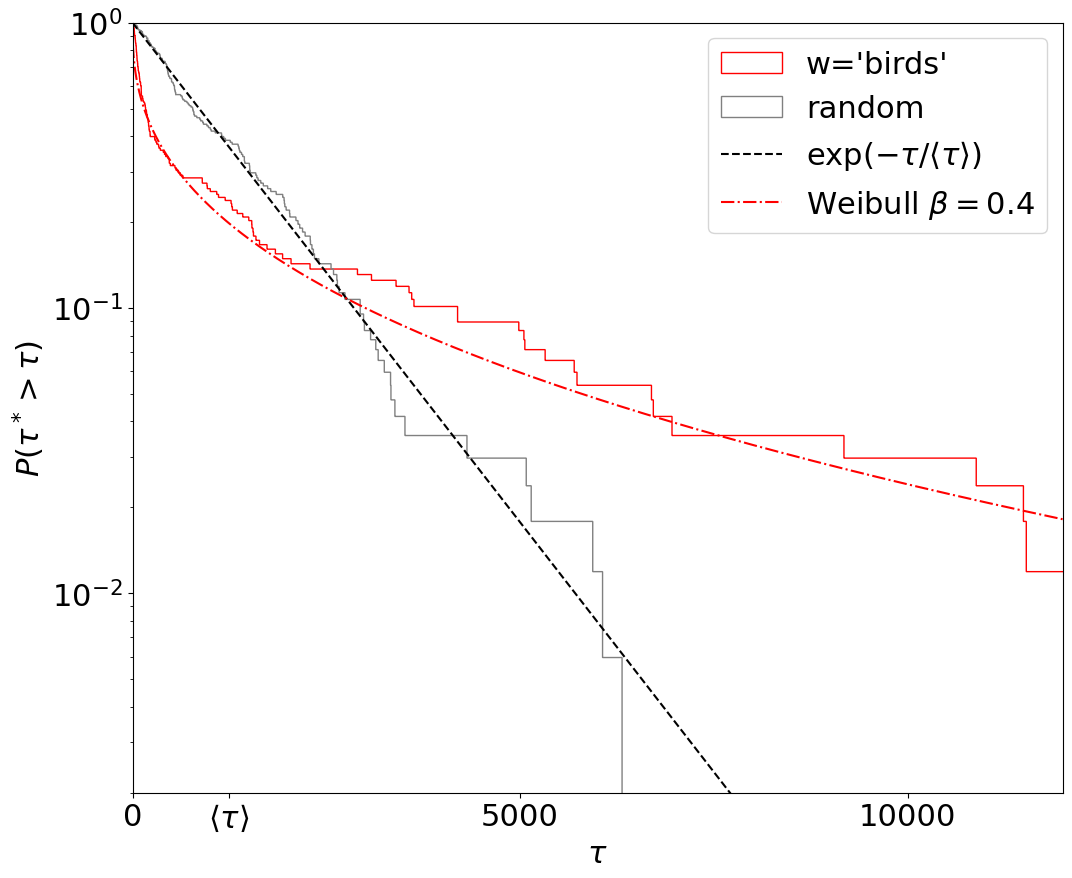

In [29]:
font = {'size'   : 22}

matplotlib.rc('font', **font)

matplotlib.rcParams.update({'font.size': 22})

plt.figure(figsize=[12,10])
plt.hist(recurrences[0],bins=max(recurrences[0]),cumulative=-1,density=True,histtype='step',label="w='birds'",color="red")
plt.hist(recurrences[1],bins=max(recurrences[1]),cumulative=-1,density=True,histtype='step',label="random",color="gray")
x=np.arange(20000)
mu = 1/np.average(recurrences[0])
plt.plot(x,np.exp(-mu*x),"--",color="Black",label=r"$\exp(-\tau/\langle \tau \rangle)$")
beta=0.4
plt.plot(x,weibull(x,beta,mu),"-.",color="Red",label=r"Weibull $\beta=$"+str(beta))
plt.yscale("log")
plt.xlim(0,12000)
plt.ylim(0.002,1)
plt.ylabel(r'$P(\tau^*>\tau$)')
plt.xlabel(r'$\tau$')
plt.xticks([0,np.average(recurrences[0]),5000,10000],labels=["0",r"$\langle \tau \rangle$","5000","10000"])
plt.legend()
plt.savefig("fig/weibullBird.png",dpi=300,bbox_inches='tight')
plt.show()

In [13]:
x0=[listWords.index('birds'),listRandom.index('birds')]                                                         

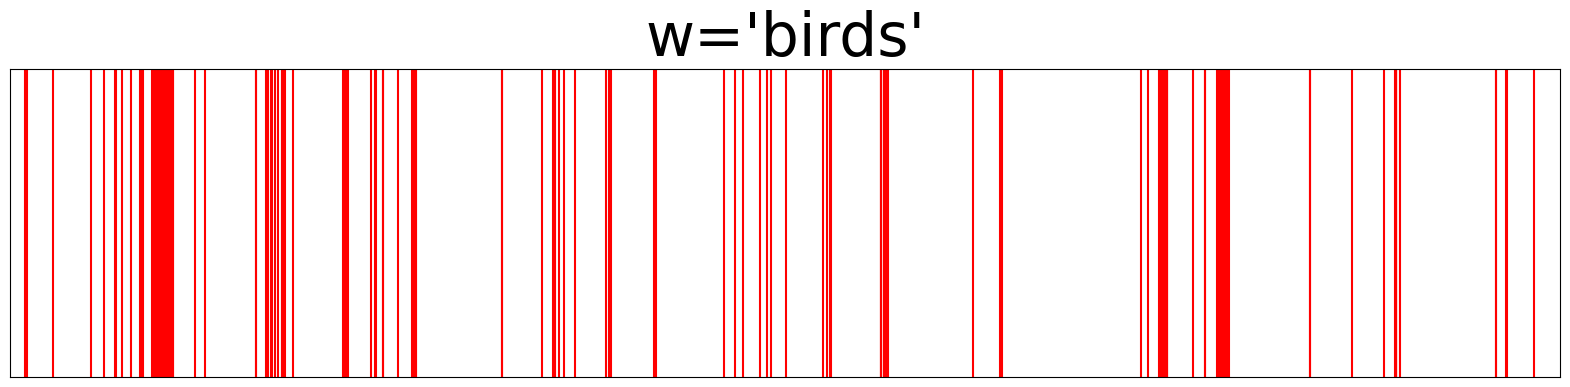

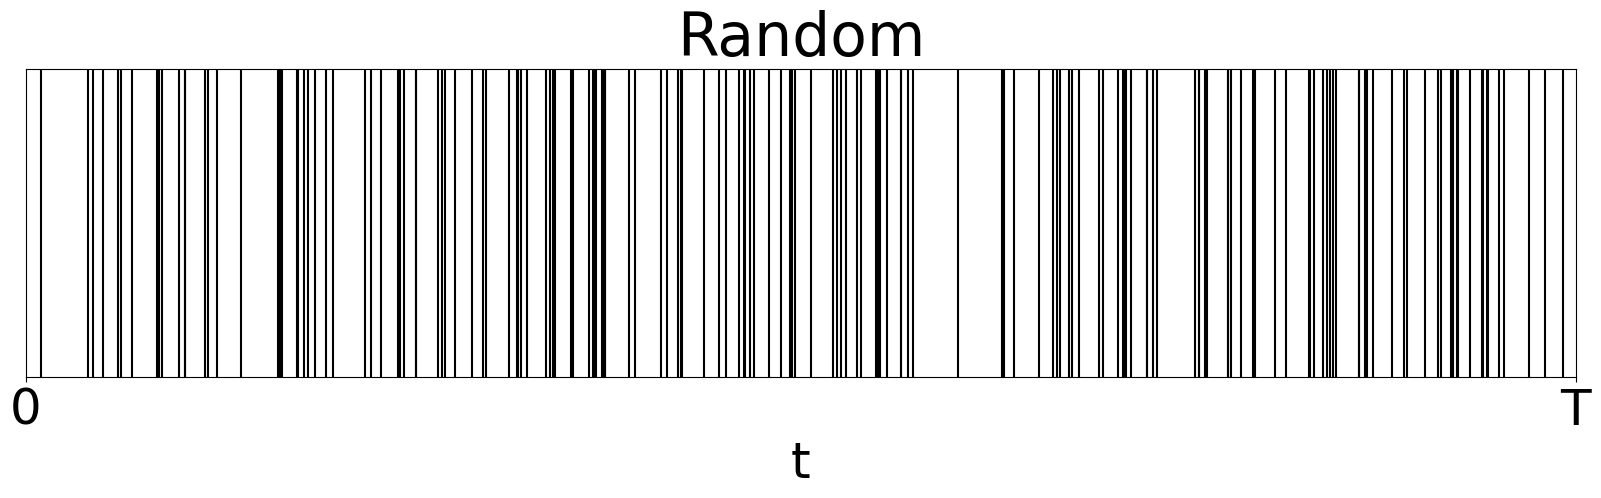

In [30]:
font = {'size'   : 36}
matplotlib.rc('font', **font)


words=["w='birds'","Random"]
cs=["Red","Black"]

j=0
plt.figure(figsize=[20,4])
seq=recurrences[j]
x= x0[j]
for i in np.arange(1,len(seq),1):
    x=x+seq[i]
#    print(i,x,x/len(listWords))
    plt.axvline(x=x/len(listWords),color=cs[j])
plt.yticks([])
plt.xticks([])
plt.title(words[j])
plt.savefig("fig/burstyBird.png", dpi=300,bbox_inches='tight')
plt.show()


j=1
plt.figure(figsize=[20,4])
seq=recurrences[j]
x= x0[j]
for i in np.arange(1,len(seq),1):
    x=x+seq[i]
#    print(i,x,x/len(listWords))
    plt.axvline(x=x/len(listWords),color=cs[j])
plt.yticks([])
plt.xticks([0,1],labels=['0','T'])
plt.xlabel("t")
plt.title(words[j])
plt.savefig("fig/burstyRandom.png", dpi=300,bbox_inches='tight')
plt.show()

# Transformation to Linear

In [31]:
import scipy as sp

In [32]:
recurrences[0].sort()
recurrences[1].sort()

In [33]:
cumulative=[[],[]]
y=1
for i in range(len(recurrences[0])):
    cumulative[0].append(y)
    #print(recurrences[0][i],y)
    y=y-1/len(recurrences[0])
    #print(recurrence[i],y)
y=1    
for i in range(len(recurrences[1])):
    cumulative[1].append(y)
    #print(recurrences[0][i],y)
    y=y-1/len(recurrences[1])
    #print(recurrence[i],y)

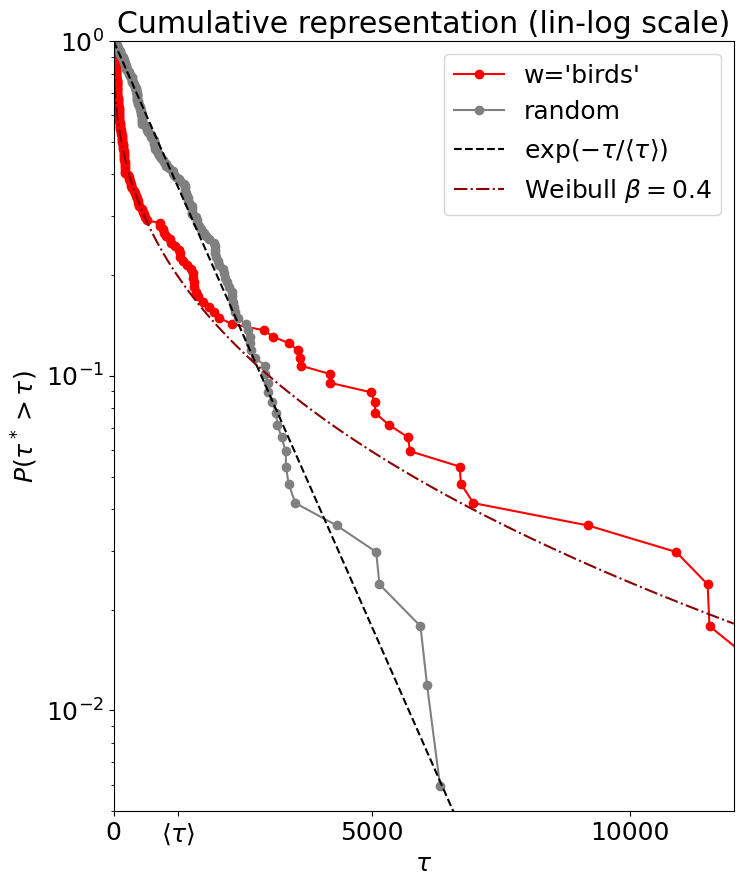

In [34]:
font = {'size'   : 18}

matplotlib.rc('font', **font)

matplotlib.rcParams.update({'font.size': 18})

plt.figure(figsize=[8,10])
#plt.hist(recurrences[0],bins=max(recurrences[0]),cumulative=-1,density=True,histtype='step',label="w='birds'",color="red")
plt.plot(recurrences[0],cumulative[0],"o-",color="red",label="w='birds'")
#plt.hist(recurrences[1],bins=max(recurrences[1]),cumulative=-1,density=True,histtype='step',label="random",color="gray")
plt.plot(recurrences[1],cumulative[1],"o-",color="gray",label="random")
x=np.arange(20000)
mu = 1/np.average(recurrences[0])
plt.plot(x,np.exp(-mu*x),"--",color="Black",label=r"$\exp(-\tau/\langle \tau \rangle)$")
beta=0.4
plt.plot(x,weibull(x,beta,mu),"-.",color="darkred",label=r"Weibull $\beta=$"+str(beta))
plt.yscale("log")
plt.xlim(0,12000)
plt.ylim(0.005,1)
plt.ylabel(r'$P(\tau^*>\tau$)')
plt.xlabel(r'$\tau$')
plt.xticks([0,np.average(recurrences[0]),5000,10000],labels=["0",r"$\langle \tau \rangle$","5000","10000"])
plt.legend()
plt.title("Cumulative representation (lin-log scale)")
plt.savefig("fig/representation-weibull1.png", dpi=300,bbox_inches='tight')
plt.show()

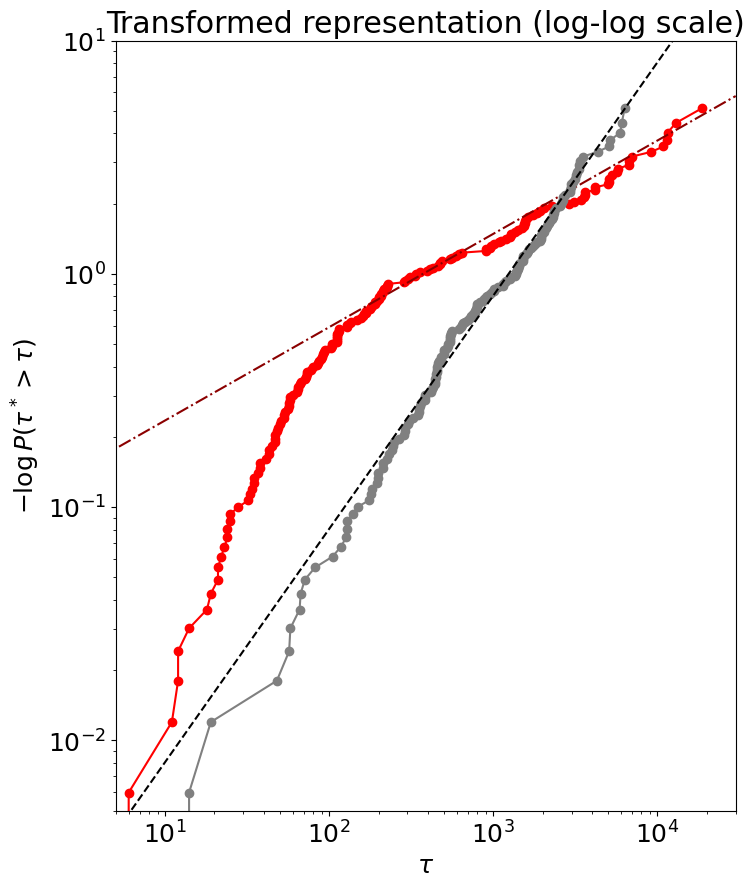

In [35]:
font = {'size'   : 18}

matplotlib.rc('font', **font)
matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=[8,10])
x=np.arange(30000)
plt.plot(recurrences[0],-np.log(cumulative[0]),"-o",color="Red")
plt.plot(x,-np.log(weibull(x,beta,mu)),"-.",color="darkred",label=r"Weibull $\beta=$"+str(beta))

plt.plot(recurrences[1],-np.log(cumulative[1]),"-o",color="gray")
plt.plot(x,mu*x,"--",color="Black")


plt.yscale("log")
plt.xscale("log")
plt.xlim(5,30000)
plt.ylim(0.005,10)
plt.ylabel(r'$-\log P(\tau^*>\tau$)')
plt.xlabel(r'$\tau$')
#plt.xticks([0,np.average(recurrences[0]),5000,10000],labels=["0",r"$\langle \tau \rangle$","5000","10000"])
#plt.legend()
plt.title("Transformed representation (log-log scale)")
plt.savefig("fig/representation-weibull2.png", dpi=300,bbox_inches='tight')
plt.show()